Bank-full.csv dataset

Predict Output variable 'y' using Logistic regression.

y -> Whether the client has subscribed a term deposit or not

In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.duplicated().sum()

0

bank.csv does not contain any null values and no duplicates. But the categorical variables have unknown values which are treated as null values

In [ ]:
# target class count
bank["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

88% of the data is 'no' and only 12 is 'yes'. Therefore, our data is imbalanced. When building the classification algorithm we will have to apply an oversampling method to avoid the model predicting based on size.

In [ ]:
#seperate the categorical variables
cat_var=bank.select_dtypes(include=["object"])
cat_var.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no


In [ ]:
#To check the number of unknowns in each column
for column in cat_var:
  print(column,':',bank[column].value_counts())

job : blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital : married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education : secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default : no     44396
yes      815
Name: default, dtype: int64
housing : yes    25130
no     20081
Name: housing, dtype: int64
loan : no     37967
yes     7244
Name: loan, dtype: int64
contact : cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month : may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome : unknown    369

We found unknowns in job,education,telephone and poutcome variables. 

In [ ]:
# replace "unknown" with the mode (as mode is used for categorical variable)
for column in cat_var:
    mode= bank[column].mode()[0]
    bank[column]= bank[column].replace("unknown", mode)

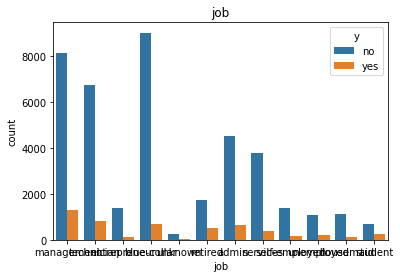

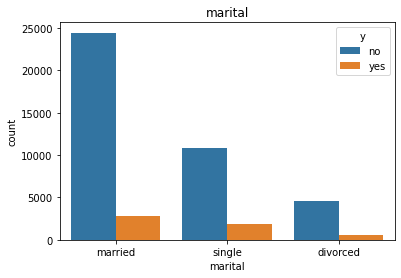

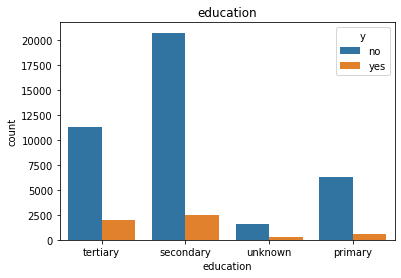

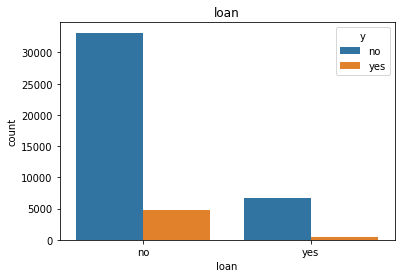

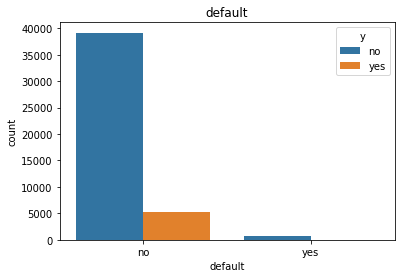

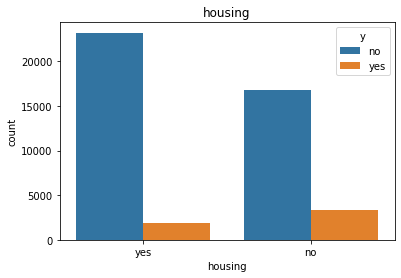

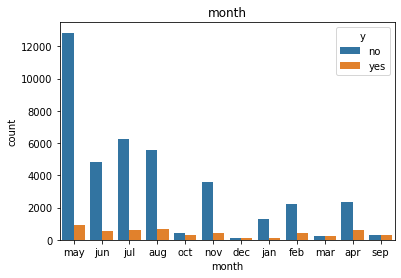

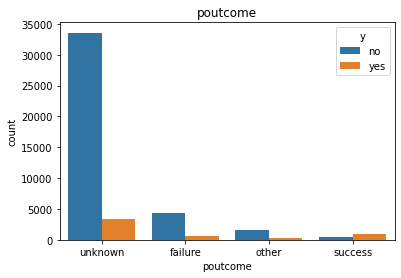

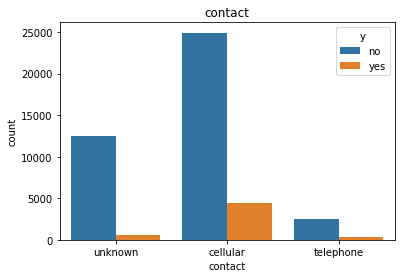

In [ ]:
for col in ['job','marital','education','loan','default','housing','month','poutcome','contact']:
  sns.countplot(x=cat_var[col],hue=cat_var.y)
  plt.title(col)
  plt.show()

In [ ]:
pd.crosstab(cat_var['default'], bank.y)

y,no,yes
default,,
no,39159,5237
yes,763,52


Drop the default column as it does not give much information since most of the observations are NO. 

In [ ]:
cat_var=cat_var.drop(["default"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, let us analyse the numerical variables for the presence of any outliers

In [ ]:
num_var=bank.select_dtypes(include="int64")
num_var.head(2)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0


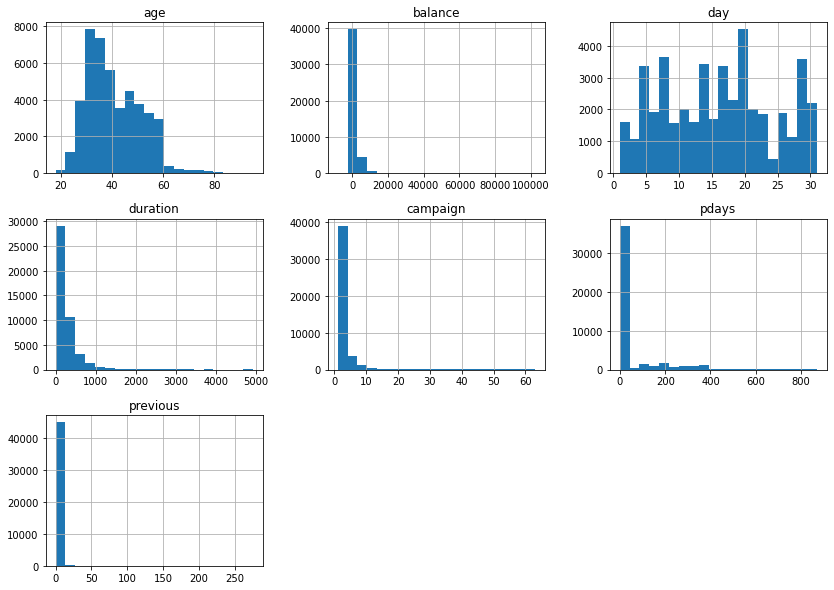

In [ ]:
bank.hist(bins=20, figsize=(14,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

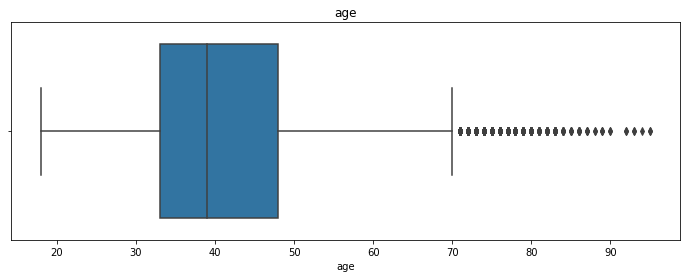

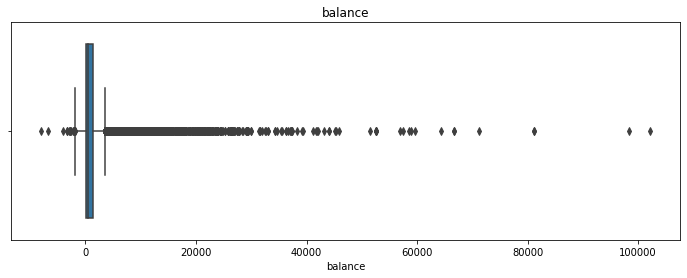

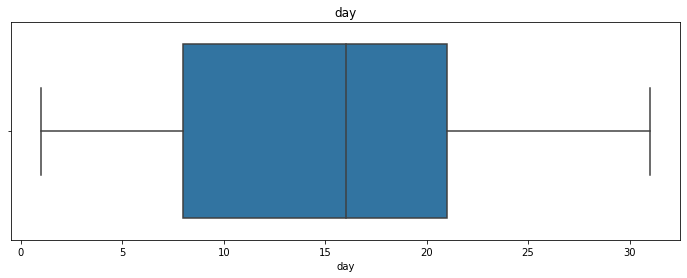

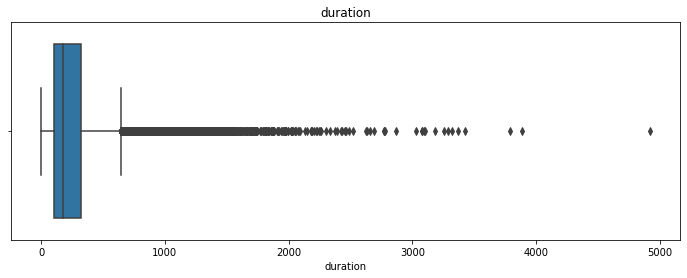

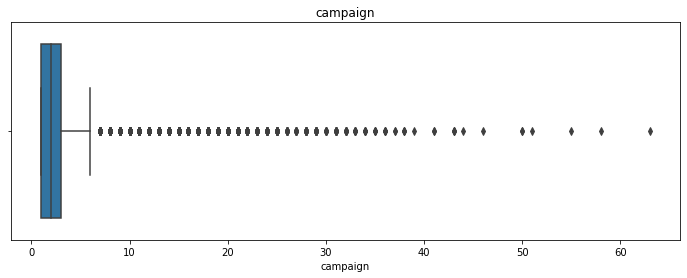

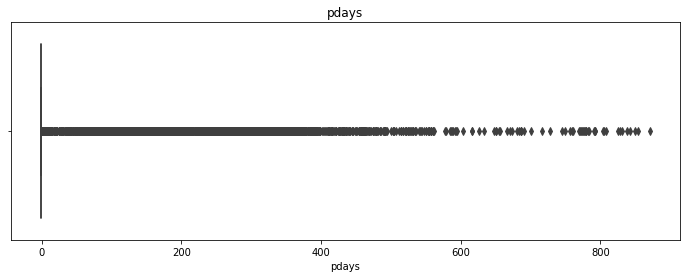

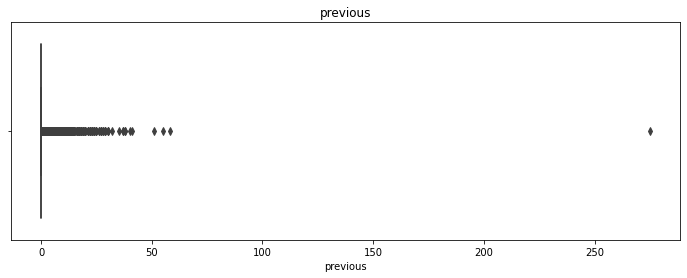

In [ ]:
for column in num_var:
  plt.figure(figsize=(12,4))
  sns.boxplot(num_var[column])
  plt.title(column)


From the above graphs, we can clearly see that the features age,balance,duration and campaign have outliers

In [ ]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

Most of the customers were contacted for the first time. This will not be very useful for our model, hence, drop pdays

In [ ]:
bank=bank.drop(["pdays"],axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,0,unknown,no


Outlier treatment

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


*   The minimum age is 18 and max 95 years. The targetted age tend to be between 32 and 47 (interquantile range).
*   The mean of balance is 1362.27 and std deviation is more(3044.7) which means the balance amount is heavily distributed.
*   previous- most of the values are 0. Similarly to the 'pdays' attribute, this means that most of the clients haven't been contacted before

As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

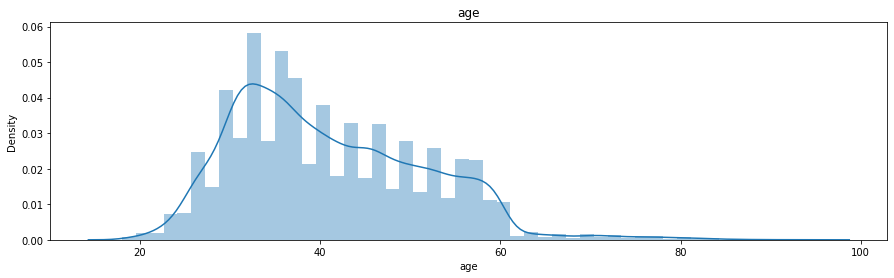

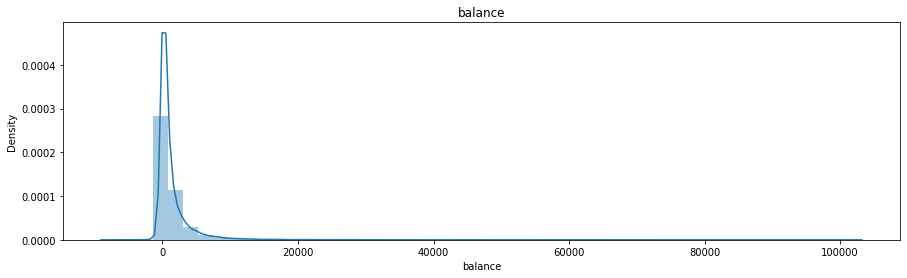

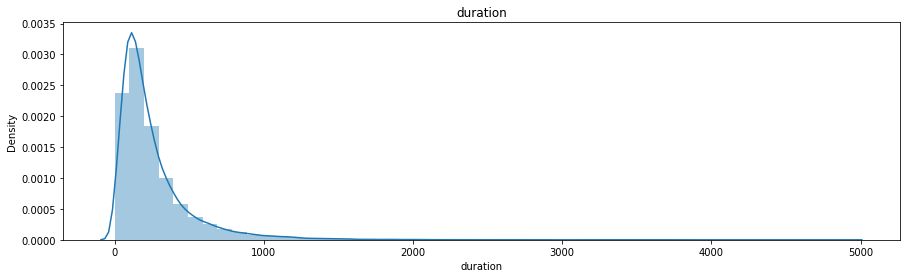

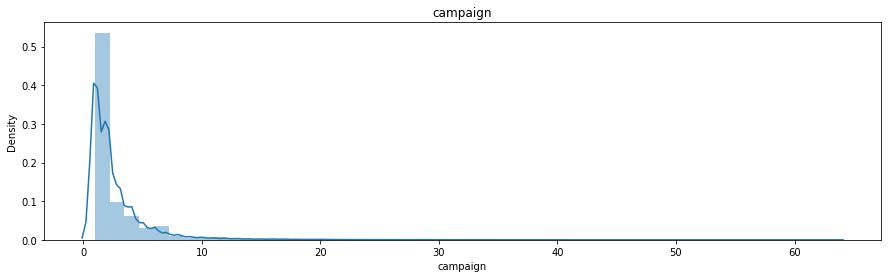

In [ ]:
for column in ['age','balance','duration','campaign']:
  plt.figure(figsize=(15,4))
  sns.distplot(bank[column])
  plt.title(column)

age, duration and campaign are skewed towards right, we will compute the IQR and replace the outliers with the lower and upper boundaries

In [ ]:
# Outlier treatment (IQR Approach)
lower_bound= []
upper_bound= []
for col in ["age", "duration", "campaign","balance"]:
    IQR= bank[col].quantile(0.75) - bank[col].quantile(0.25)
    lower= bank[col].quantile(0.25) - (1.5*IQR)
    upper= bank[col].quantile(0.75) + (1.5*IQR)
    
    print(col, ":", lower, ",",  upper)
    
    lower_bound.append(lower)
    upper_bound.append(upper)

age : 10.5 , 70.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0
balance : -1962.0 , 3462.0


In [ ]:
# Since,all the above features are positively skewed, replace the all the outliers which is greater then upper boundary by upper bound
j = 0
for col in ["age", "duration", "campaign","balance"]:
    bank.loc[bank[col] > upper_bound[j], col] = int(upper_bound[j])
    j = j + 1 

In [ ]:
#without outliers
bank.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,933.264692,15.806419,234.939307,2.392228,0.580323
std,10.379659,1178.527538,8.322476,176.749932,1.600111,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,70.000000,3462.000000,31.000000,643.000000,6.000000,275.000000


Encoding categorical variables

In [ ]:
for col in ['job','marital','education','loan','housing','month','poutcome','contact']:
  print(col,':',bank[col].nunique())

job : 11
marital : 3
education : 3
loan : 2
housing : 2
month : 12
poutcome : 4
contact : 2


We will use LabelEncoder for the columns as most of them have more than 2 categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for feature in ['job','marital','education','loan','housing','month','poutcome','contact','y']:
  bank[feature]=le.fit_transform(bank[feature])

In [ ]:
bank=bank.drop(["default"],axis=1)

In [ ]:
#label encoded dataset
bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,0,5,8,261,1,0,3,0
1,44,9,2,1,29,1,0,0,5,8,151,1,0,3,0
2,33,2,1,1,2,1,1,0,5,8,76,1,0,3,0
3,47,1,1,1,1506,1,0,0,5,8,92,1,0,3,0
4,33,1,2,1,1,0,0,0,5,8,198,1,0,3,0


In [ ]:
#Seperating dependant and independant values
X=bank.iloc[:,:-1].values
y=bank.iloc[:,-1].values

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic** **Regression**

In [ ]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=log_reg.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
print('Accuracy: {:.2f} %'.format(accuracy_score(y_pred,y_test)*100))

[[11682  1327]
 [  284   271]]
Accuracy: 88.12 %


In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.49      0.17      0.25      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.57      0.59     13564
weighted avg       0.85      0.88      0.85     13564



###AUC-ROC Curve

Text(0, 0.5, 'True Positive Rate')

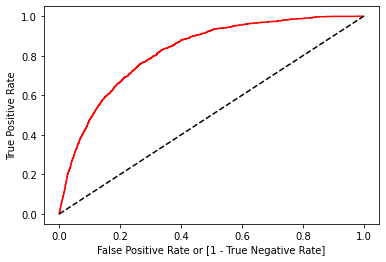

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,log_reg.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')